## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

**<font color='teal'> Load the distance dataset into a dataframe. </font>**

In [8]:
df = pd.read_csv("distance_dataset.csv",index_col =0)

In [9]:
df.head()

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2
3,5.470224,5.069249,5.768313,4
4,2.381797,2.402374,3.879101,1


### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [10]:
mat = df[['X','Y','Z']]
matYZ = df[['Y','Z']]

Calculate the cosine similarity for those matrices with reference planes of 5,5 and 5,5,5. Then subtract those measures from 1 in new features.

In [16]:
simCosine3D = 1. - cosine_similarity(mat, [[5,5,5]], 'cosine')
simCosine = 1. - cosine_similarity(matYZ, [[5,5]], 'cosine')

Using the 2D matrix and the reference plane of (5,5) we can use a scatter plot to view the way the similarity is calculated using the Cosine angle.

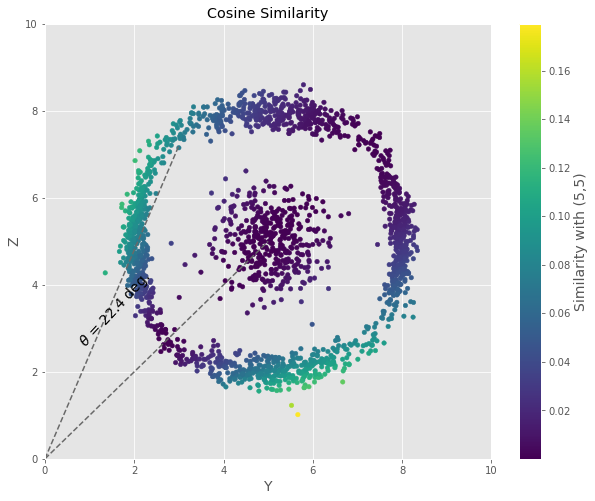

In [17]:
figCosine = plt.figure(figsize=[10,8])

plt.scatter(df.Y, df.Z, c=simCosine[:,0], s=20)
plt.plot([0,5],[0,5], '--', color='dimgray')
plt.plot([0,3],[0,7.2], '--', color='dimgray')
plt.text(0.7,2.6,r'$\theta$ = 22.4 deg.', rotation=47, size=14)
plt.ylim([0,10])
plt.xlim([0,10])
plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)
plt.title('Cosine Similarity')
cb = plt.colorbar()
cb.set_label('Similarity with (5,5)', size=14)

#figCosine.savefig('similarity-cosine.png')

Now, plot the 3D matrix with the similarity and the reference plane, (5,5,5).

TypeError: '(slice(None, None, None), 0)' is an invalid key

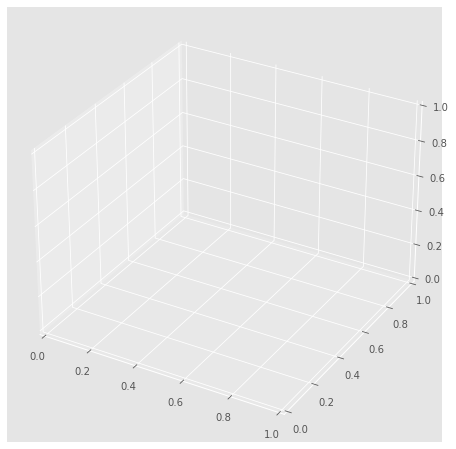

In [20]:
from mpl_toolkits.mplot3d import Axes3D
figCosine3D = plt.figure(figsize=(10, 8))
ax = figCosine3D.add_subplot(111, projection='3d')

p = ax.scatter(mat[:,0], mat[:,1], mat[:,2], c=simCosine3D[:,0])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
cb = figCosine3D.colorbar(p)
cb.set_label('Similarity with (5,5,5)', size=14)
                                   
figCosine3D.tight_layout()
#figCosine3D.savefig('cosine-3D.png', dpi=300, transparent=True)

----

### Cosine Similarity with text data
This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs. 
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1. 

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"

corpus = [Document1,Document2]

X_train_counts = count_vect.fit_transform(corpus)

pd.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names(),index=['Document 0','Document 1'])

,coffee,essence,of,starbucks
Document 0,1,0,0,1
Document 1,1,1,1,0


Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['Document 0','Document 1'])

,coffee,essence,of,starbucks
Document 0,0.579739,0.000000,0.000000,0.814802
Document 1,0.449436,0.631667,0.631667,0.000000


Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

In [23]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.26055567]])

Replace the current values for `Document 0` and `Document 1` with your own sentence or paragraph and apply the same steps as we did in the above example.

 **<font color='teal'> Combine the documents into a corpus.</font>**

In [24]:
Document1 = 'J’Nai Bridges, known for her “plush-voiced mezzo-soprano” (The New York Times), has been heralded as “a rising star” (Los Angeles Times), gracing the world’s top stages. Her 2019-2020 operatic engagements in the U.S. this season include her debut at The Metropolitan Opera, singing the role of Nefertiti in Philip Glass’ opera Akhnaten, and her house and role debut at Washington National Opera performing Dalila in Samson et Dalila. Bridges will sing the title role of Carmen for the first time in Europe at the Dutch National Opera and will make her debut with the Festival d’Aix-en-provence singing Margret in a new production of Wozzeck, conducted by Sir Simon Rattle.'
Document2 = 'Called “one of the most versatile singing artists performing today” (Bachtrack), baritone Will Liverman is quickly gaining a reputation for his compelling performances, while making significant debuts at opera houses across the world. Liverman is a recipient of a 2019 Richard Tucker Career Grant and Sphinx Medal of Excellence. In the 2019-20 season, Liverman returns to the Metropolitan Opera as Papageno in its holiday production of The Magic Flute, in addition to singing the role of Horemhab in the Met’s premiere of Philip Glass’ Akhnaten. He also appears as Pantalone in The Love of Three Oranges at Opera Philadelphia, as Marcello in La bohème at Seattle Opera, and as Silvio in Pagliacci at Opera Colorado and Portland Opera, in addition to performing Schubert’s Die Winterreise at The Barns at Wolf Trap Opera. Recent engagements include Liverman’s Metropolitan Opera debut as Malcolm Fleet in Nico Muhly’s Marnie and appearances with Tulsa Opera as The Pilot in The Little Prince; with Opera Philadelphia, Santa Fe Opera, and Dallas Opera as Schaunard in La bohème; and with Santa Fe Opera as the Foreman at the Mill in Jenůfa. '
corpus = [Document1,Document2]

 **<font color='teal'> Apply the count vectorizer to the corpus to transform it into vectors.</font>**

In [25]:
X2_train_counts = count_vect.fit_transform(corpus)

 **<font color='teal'> Convert the vector counts to a dataframe with Pandas.</font>**

In [26]:
pd.DataFrame(X2_train_counts.toarray(),columns=count_vect.get_feature_names(),index=['Jnai Bridges','Will Liverman'])

,20,2019,2020,across,addition,aix,akhnaten,also,and,angeles,...,voiced,washington,while,will,winterreise,with,wolf,world,wozzeck,york
Jnai Bridges,0,1,1,0,0,1,1,0,3,1,...,1,1,0,2,0,1,0,1,1,1
Will Liverman,1,2,0,1,2,0,1,1,6,0,...,0,0,1,1,1,3,1,1,0,0


 **<font color='teal'> Apply TF-IDF to convert the vectors to unique frequency measures.</font>**

In [27]:
trsfm=vectorizer.fit_transform(corpus)

In [28]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.55030193]])

 **<font color='teal'> Use the cosine similarity function to get measures of similarity for the sentences or paragraphs in your original document.</font>**

In [29]:
df2 = pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['Jnai Bridges','Will Liverman'])
df2

,20,2019,2020,across,addition,aix,akhnaten,also,and,angeles,...,voiced,washington,while,will,winterreise,with,wolf,world,wozzeck,york
Jnai Bridges,0.000000,0.052142,0.073284,0.000000,0.000000,0.073284,0.052142,0.000000,0.156427,0.073284,...,0.073284,0.073284,0.000000,0.104285,0.000000,0.052142,0.000000,0.052142,0.073284,0.073284
Will Liverman,0.045223,0.064353,0.000000,0.045223,0.090445,0.000000,0.032176,0.045223,0.193058,0.000000,...,0.000000,0.000000,0.045223,0.032176,0.045223,0.096529,0.045223,0.032176,0.000000,0.000000
